# Problem Set 1
## PPOL 566

For this assignment, you must submit a completed version of this notebook on Canvas no later than **11:59 PM on Wednesday, September 7**. The filename must end with your Georgetown NetID.

**Written responses** must be written in Markdown within the notebook. For full credit, responses must be written in complete sentences with proper spelling and grammar. Any references included must be properly cited. Failure to properly cite sources will result in a zero on the assignment.

**Code** must run without warnings or errors. Scripts that produce errors will receive zero points for those sections. For full credit, code must be free of semantic errors, be written with liberal comments, include meaningful variable names, and use control structures to minimize repetition (three or more instances of nearly identical statements. NOTE: There is an empty cell after each problem. This does not mean that all code for a given section must be placed in one cell. You may use as many cells as you would like for each section.

## Part 1

### 1.1) Discuss two ways that domain expertise can be applied to unsupervised learning methods.

<font face = "Arial" size = 3>
Domain expertise is useful when dealing with outliers. With domain knowledge it is possible to determine and decide if an outlier can be easily excluded from the analysis or should still be kept in and examined separately. 
Domain knowledge is also helpful when trying to intepret the results and patterns captured by unsupervised learning methods which is an inherently difficult task due to the lack of labelled data. 
</font>

### 1.2) Describe one scenario in which you *would* use principal components analysis and describe another scenario in which you *would not* use principal components analysis.

<font face = "Arial" size = 3>
Principal Component Analysis or PCA is an effective tool for dimensionality reduction. It is particularly useful for datasets with high dimensions and which have an underlying linear structure(Lever, 2017). One common use case of PCA is in studying effect of different genes in a living organism. It is useful to reduce dimensionality in such cases as the number of features(in this case, genes) might be large. <br>
PCA breaks down in cases of non-linearity or high correlation in the dataset(Lever, 2017). This is because the principal components are orthogonal to each other and in case of high correlation, we might not obtain more than one principal component. 
</font>

### 1.3) Define standardization and discuss its usage with principal components analysis and clustering.  Must data always be standardized?

<font face = "Arial" size = 3>
Standardization is a preprocessing step that transforms data to a single scale. After tranformation, all the data points are centered around a mean value of 0 and a standard deviation of 1. It is a very useful tool when dealing with features that have different scales or when the variables have dramatically different variances(Lever, 2017) as we need the analysis to be scale agnostic otherwise the variance captured in the data will be due to larger magnitudes and not actual variance. In Principal Component Analysis(PCA)we try to determine the features that capture the maximum variance, so not standardizing the data might lead to erroneous results.<br>
Data doen't always need to standardized. This is especially true when the feautures in question have the same scale. In those instances, it is beneficial to capture the variances using the original dataset. 
</font>

## Part 2
The **data** file for this assignment is called **pset1_data.csv** and can be found in the Data folder on Canvas. The dataset includes 876 observations for the following individual personality ratings:
 * Openness to experience
 * Conscientiousness
 * Extraversion
 * Agreeableness
 * Neuroticism
 
Together, these are known as the Big Five personality traits, often abbreviated **OCEAN**.

In [44]:
### Prelimenaries 
### Importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Reading in the data 
df_personality = pd.read_csv("pset1_data.csv")

### Exploring the data
print("Dimensions of data frame : ", df_personality.shape)
print("Columns : " ,list(df_personality.columns))
print("Column data types : ", df_personality.dtypes)
print("Head of the data frame : ")
df_personality.head()

Dimensions of data frame :  (876, 5)
Columns :  ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
Column data types :  Nscore    float64
Escore    float64
Oscore    float64
Ascore    float64
Cscore    float64
dtype: object
Head of the data frame : 


,Nscore,Escore,Oscore,Ascore,Cscore
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665
1,-0.67825,-0.30033,-1.55521,2.03972,1.63088
2,-1.32828,1.93886,-0.84732,-0.30172,1.63088
3,0.62967,2.57309,-0.97631,0.76096,1.13407
4,-0.79151,0.80523,-0.01928,0.94156,3.46436


### 2.1) Perform a dimensionality reduction using Principal Components Analysis. 

In [45]:
def pca_process(df) :
    """
    Function to perform Principal Component Analysis(PCA) on a given dataframe. 

    Arguments : 
    ~~~~~~~~~~~
    df : Object of class DataFrame that has to go through PCA

    Returns :
    ~~~~~~~~~~~
    pca_dict : Dictionary object with the results from performing PCA 
    
    """
    ### Standardizing the dataset 
    st_scaler = StandardScaler()
    df_columns = list(df.columns)
    n = df.shape[1] ### No. of columns in data frame 
    df_scaled = pd.DataFrame(st_scaler.fit_transform(df), columns = df_columns)
    
    ### Fitting the dataset to PCA 
    pca_model = PCA()
    pca_model.fit(df_scaled)

    ### Getting the loadings matrix 
    Z_matrix = np.transpose(pca_model.components_)
    Z_Columns = [f"Z{i}" for i in range(1, n+1)] ### Getting column names for Z matrix 
    Z_df = pd.DataFrame(Z_matrix, index = df_columns, columns = Z_Columns)

    ### Getting  the variance proportions 
    var_props = pca_model.explained_variance_ratio_

    ### Dictionary containing the results of the PCA model 
    pca_dict = {
        "Loadings Table" : Z_df,
        "Variance Proportions" : var_props
    }
    
    return pca_dict

### Calling the function and storing returned dictionary 
pca_results = pca_process(df_personality)

### 2.2) Display a table of principal component loadings. 

In [46]:
### Matrix Z 
### Accessing the Z_matrix from the dictionary 
pca_results["Loadings Table"]

,Z1,Z2,Z3,Z4,Z5
Nscore,0.561962,0.040939,0.256371,0.570327,0.539930
Escore,-0.523148,0.381223,-0.306198,-0.034267,0.697176
Oscore,-0.033766,0.860811,0.213478,0.244960,-0.390239
Ascore,-0.387330,-0.119581,0.886913,-0.156674,0.156571
Cscore,-0.509264,-0.312567,-0.091268,0.767464,-0.213591


### 2.3) Provide an interpretation of the loadings for the first two components.

<font face = "Arial" size = 3>
There are two ways of interpreting the principal components (PCs). The PC places larger weights on all variables except Oscore i.e. openness to experience. The weights on Nscore, Escore and Cscore are pretty near each other in magnitude. The Nscore has opposite sign to others which shows that it is inversely proportional to the other scores which could be interpreted as when extraversion increases, neuroticism decreases and vice versa. This pc could be capturing this inverse nature between positive attributes and neuroticism and be referring to the neuroticism of the person or observation. 
The second principal component lays more emphasis on openness to experience and extraversion compared to other traits. This component might be related to the extravertedness of the person.<br> <br> 
In the second interpretation, the first two PCs form a plane where the observations have maxiumum variance. (James, 2021)
</font>

### 2.4) Create a scree plot based on the PCA results.

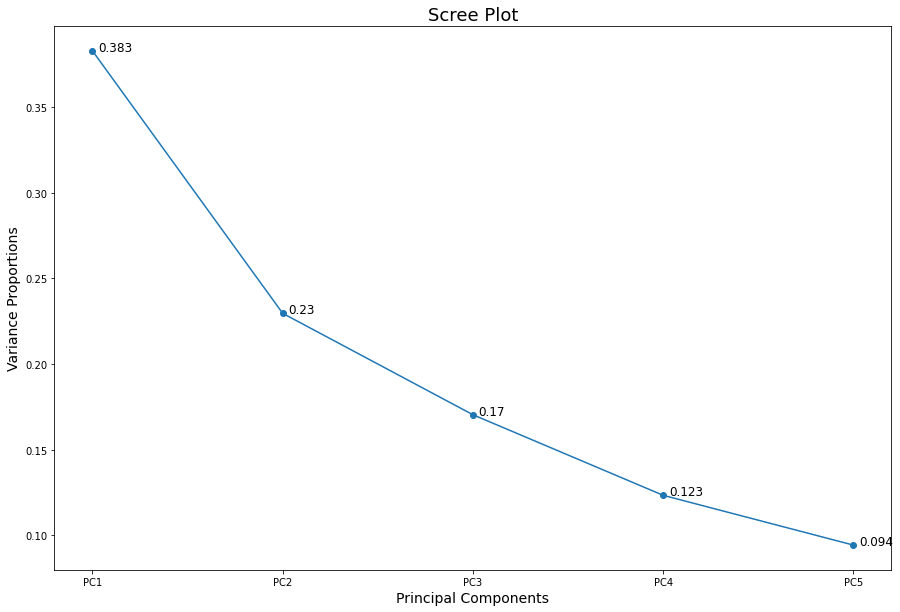

In [78]:
### Generating the scree plot 
### Accessing the Variance Proportion from the dictionary
y = pca_results["Variance Proportions"]
x = np.arange(5)
xticks_labels = [f"PC{i}" for i in range(1, len(y)+1)]

plt.figure(figsize = (15, 10))
plt.plot(y, marker = 'o')
plt.xticks(x, xticks_labels)
plt.title("Scree Plot", fontsize = 18)
plt.xlabel("Principal Components", fontsize = 14)
plt.ylabel("Variance Proportions", fontsize = 14)
for i in range(len(y)) : ### For labelling data points 
    plt.text(x[i]+0.03, y[i], round(y[i],3), size = 12)

plt.show()

### 2.5) Based on your interpretation of the scree plot, how many principal components would you keep?

<font face = "Arial" size = 3>
Based on the scree plot and the values obtained from the explained_variance_ratio_ attribute of the PCA model, I'd keep the first four principal components as they capture around 90% of the variation in the data. 
</font>

<font face = "Arial" size = 3>
<b>References : </b> <br>
James, G & Witten, D & et.al <i> An Introduction to Statistical Learning</i> <b>2021</b><br>
Lever, J & Krzywinski, M & Altman, N <i>Points of Significance : Principal Component Analysis</i> <b>2017</b>

</font>
